# loading the classes

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [3]:
df=data_cleaning('Base.csv')

In [4]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


In [6]:
df.check_duplicates()

'this data has no duplicates'

In [7]:
df.describe(flag='numerical')

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,16.718568,86.587867,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,3.288674
std,0.289125,44.046230,88.406599,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,2.209994
min,0.000001,-1.000000,-1.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,0.000000
1%,0.021672,-1.000000,0.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,-1.000000,200.000000,0.651256,0.000000
25%,0.225216,-1.000000,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,0.492153,-1.000000,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,3.000000
75%,0.755567,12.000000,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,5.000000
99%,0.997470,231.000000,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,31.000000,1500.000000,44.552828,7.000000
max,0.999999,383.000000,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,7.000000


In [8]:
df.describe(flag='categorical')

,fraud_bool,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w
count,1000000,1000000.0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,9.0,9,5,7,2,7,2,2,2,2,2,5,2,4
top,0,0.9,30,AB,CA,1,BC,0,1,0,0,INTERNET,other,1,1
freq,988971,221419.0,311433,370554,730252,529886,372143,582923,889676,777012,974758,992952,342728,576947,968067


In [9]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  category
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  category
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

# check the nulls:

In [10]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


In [11]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

<AxesSubplot: >

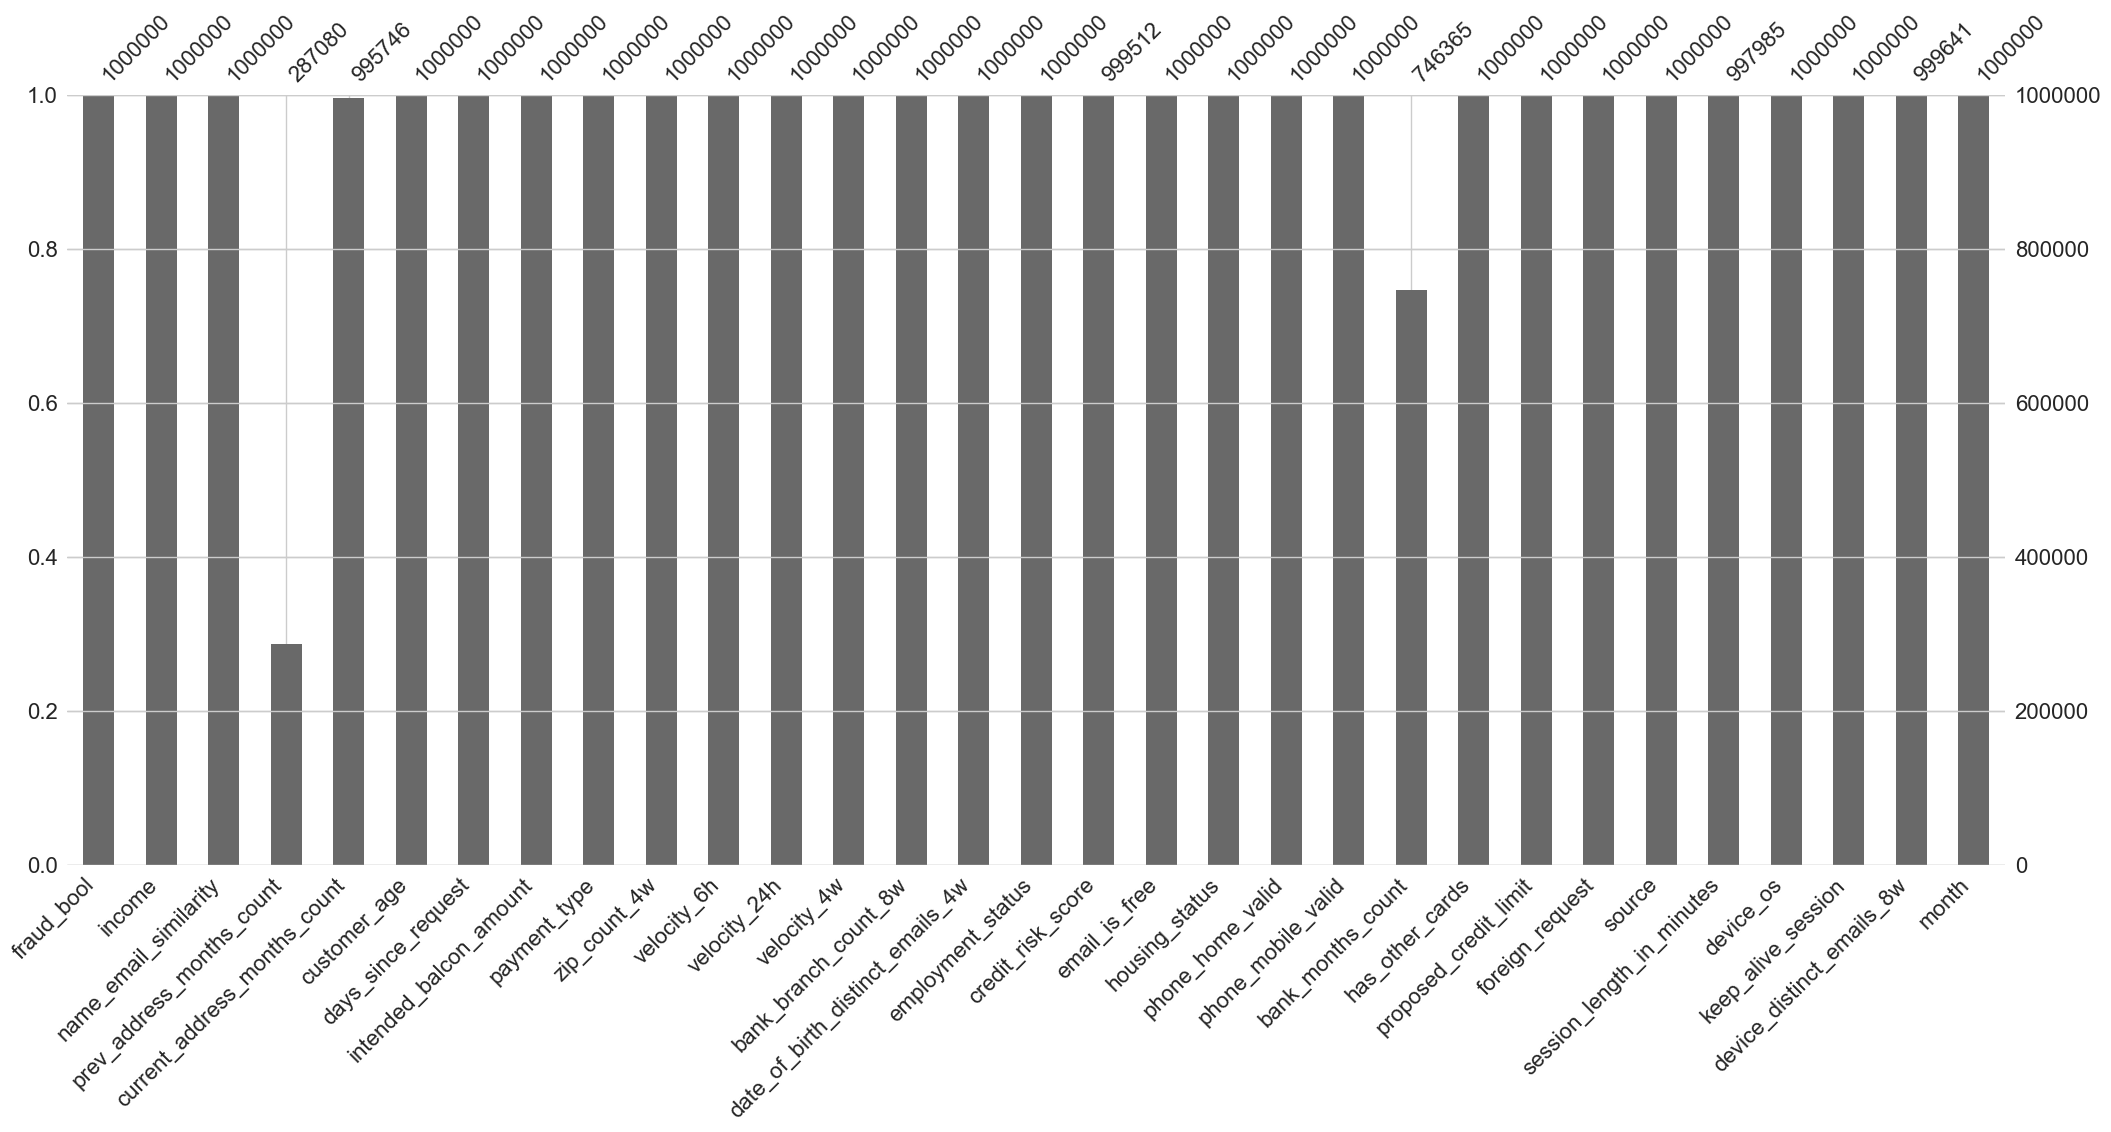

In [11]:
msno.bar(df.data)

<AxesSubplot: >

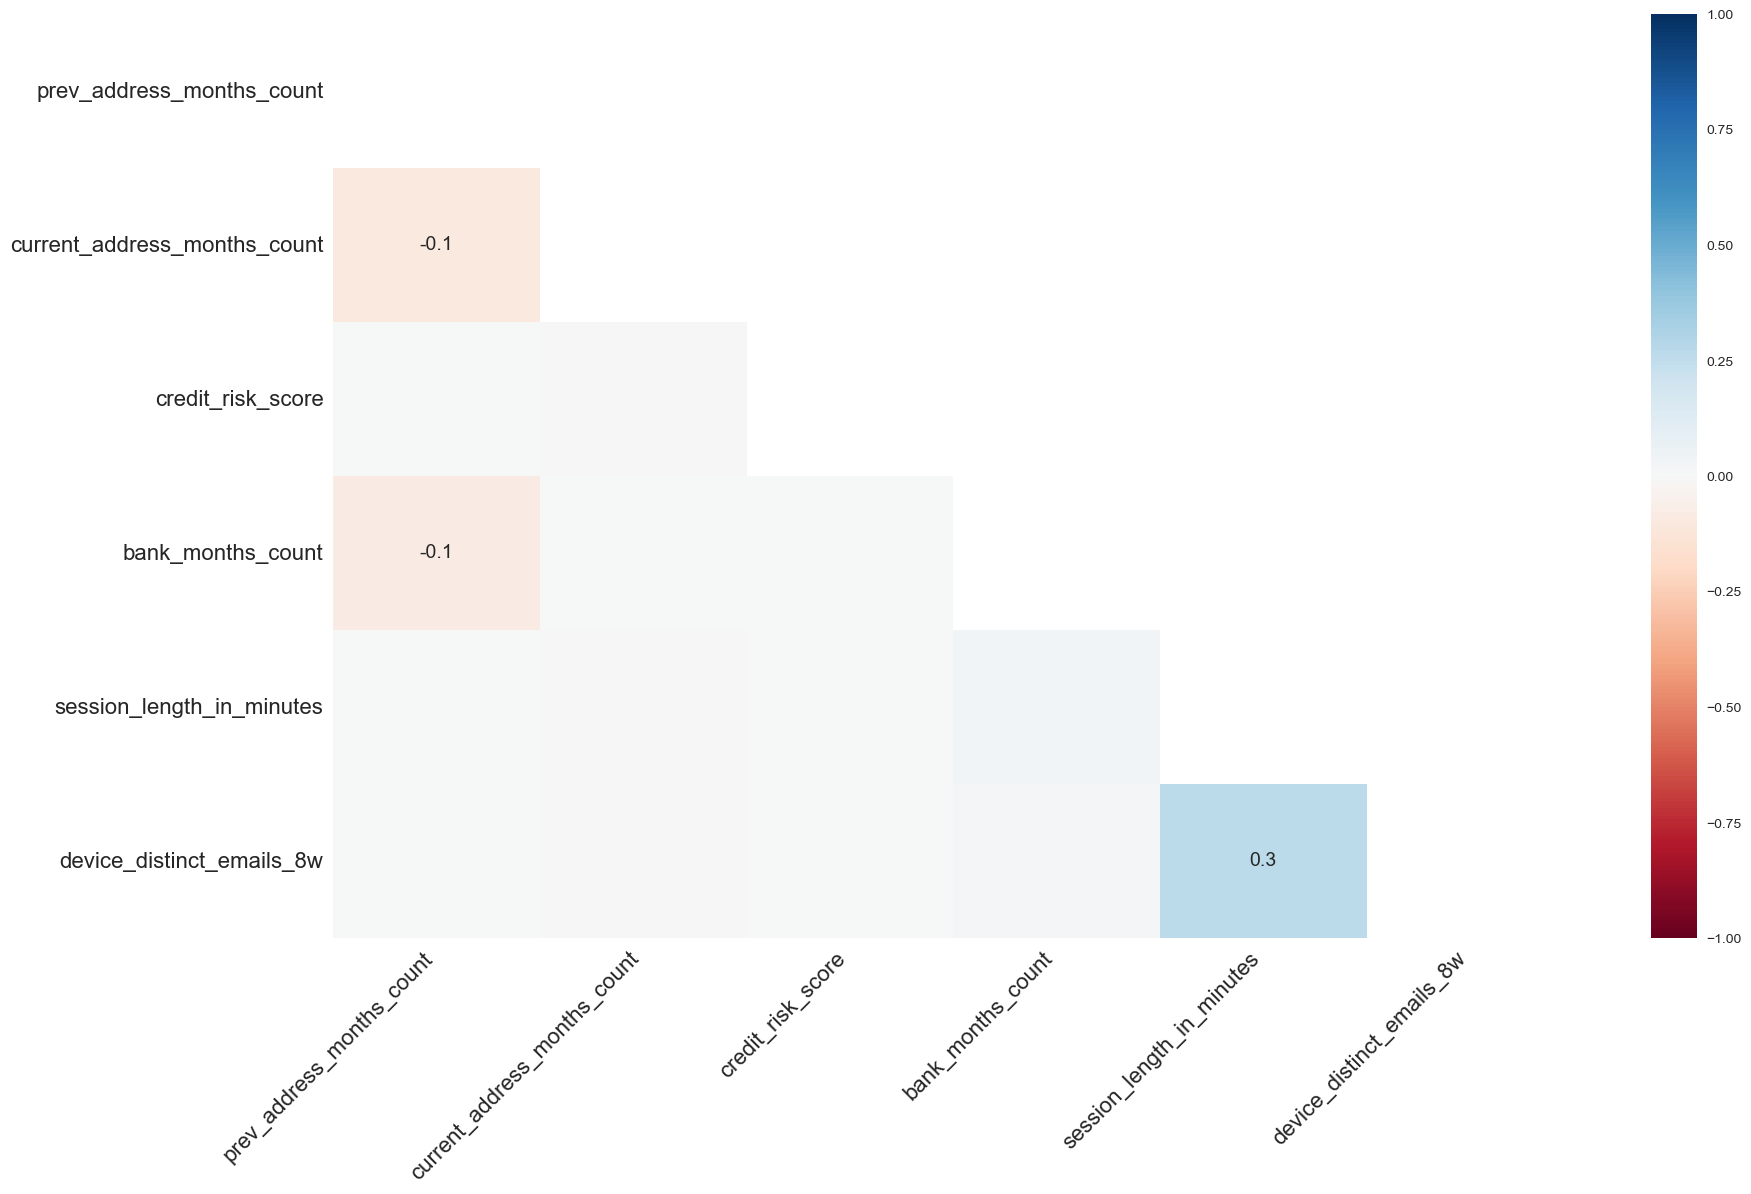

In [12]:
msno.heatmap(df.data)

<AxesSubplot: >

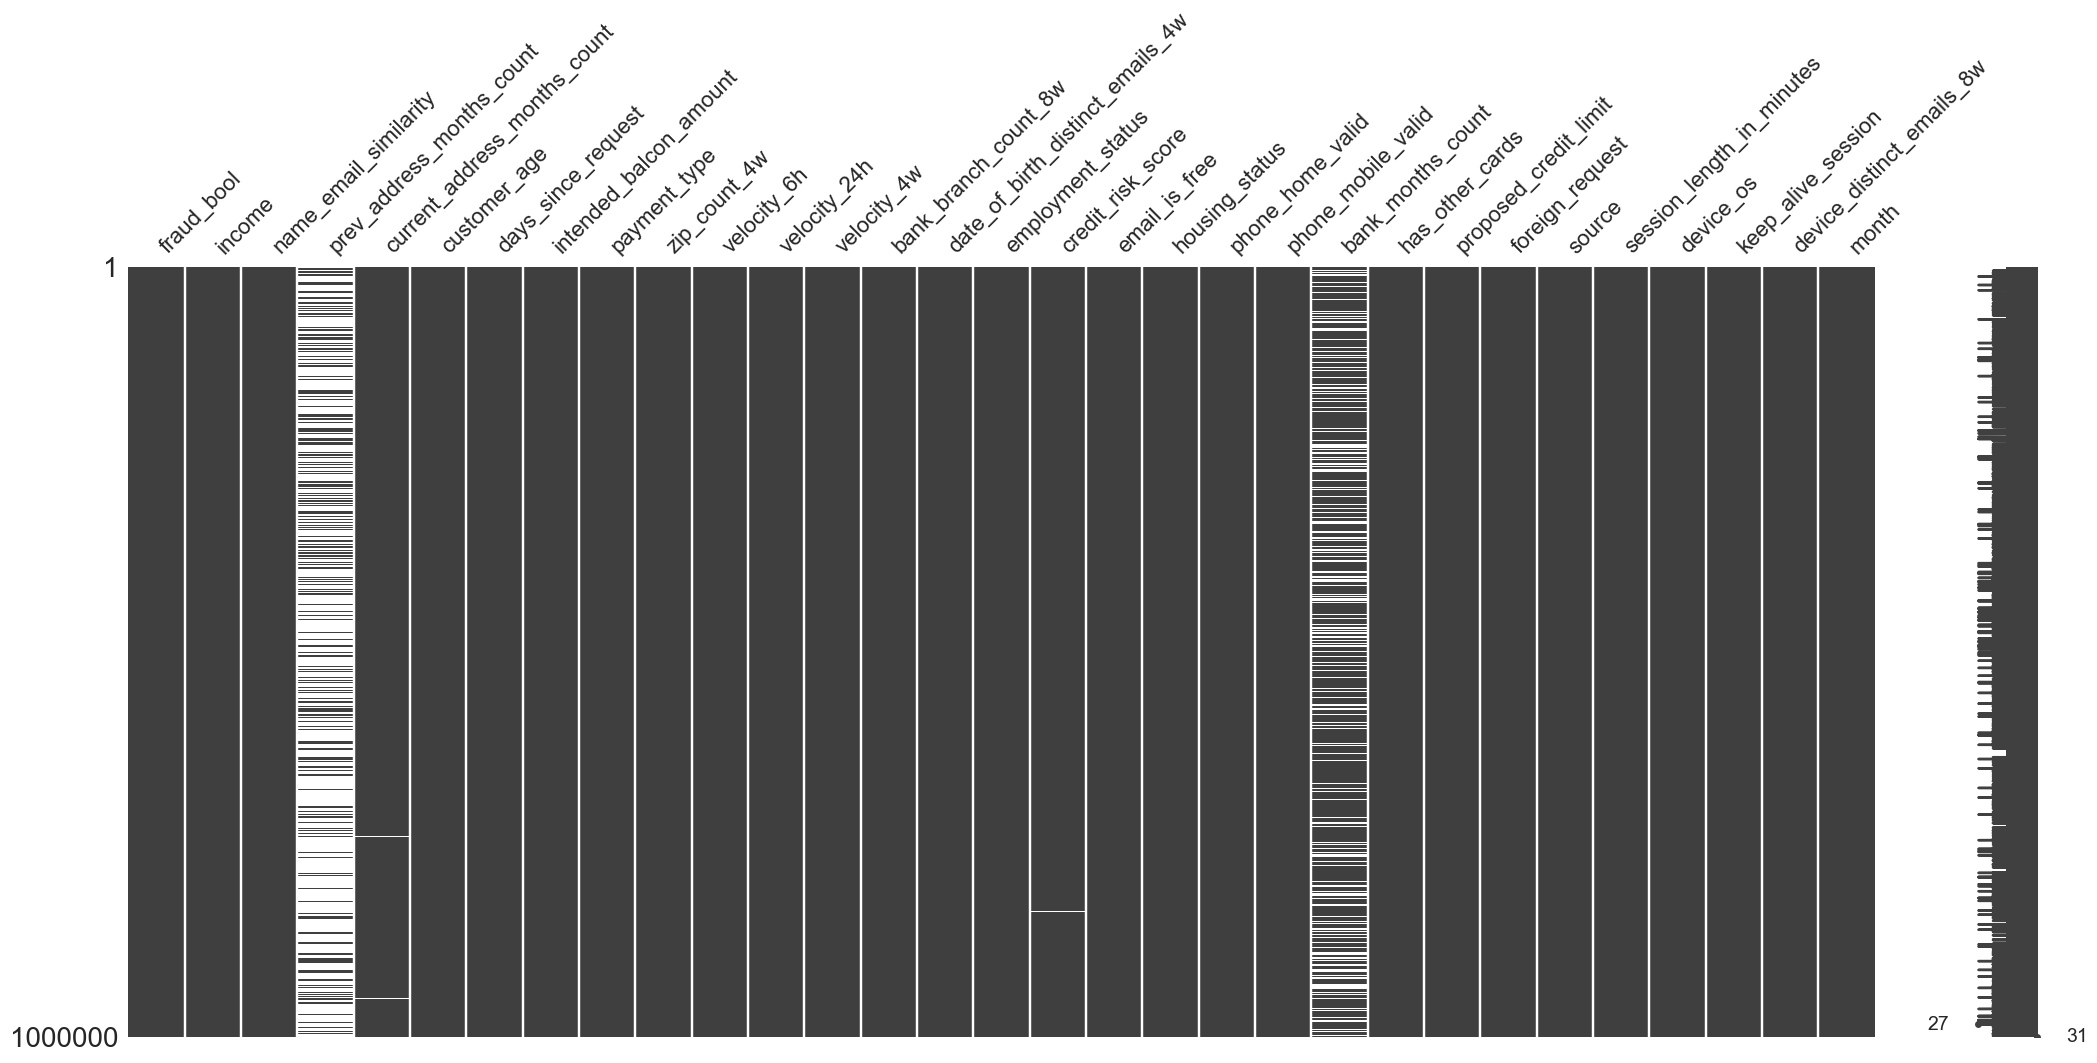

In [13]:
msno.matrix(df.data)

- i will delete prev_address_months_count and bank_months_count

In [12]:
df.delete_columns(['prev_address_months_count','bank_months_count'])

'Columns prev_address_months_count, bank_months_count deleted successfully.'

# Handling the nulls:

In [13]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

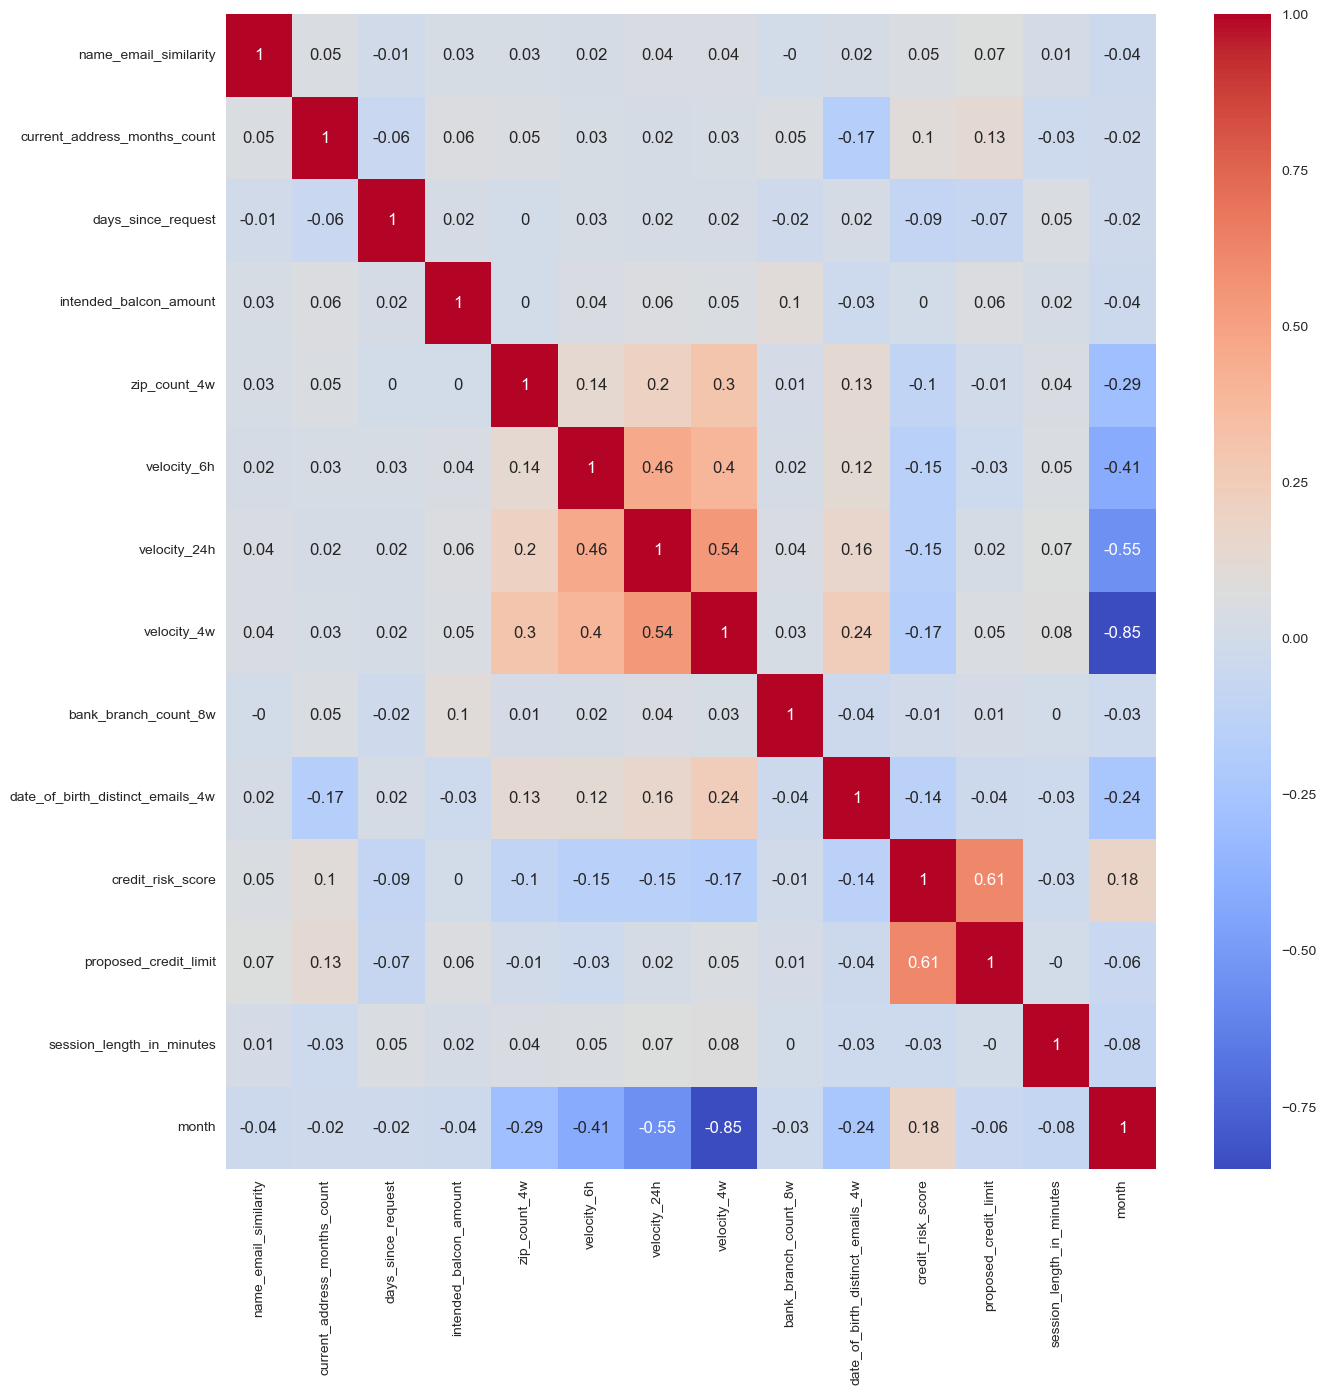

In [16]:
df.plot_corr_heatmap()

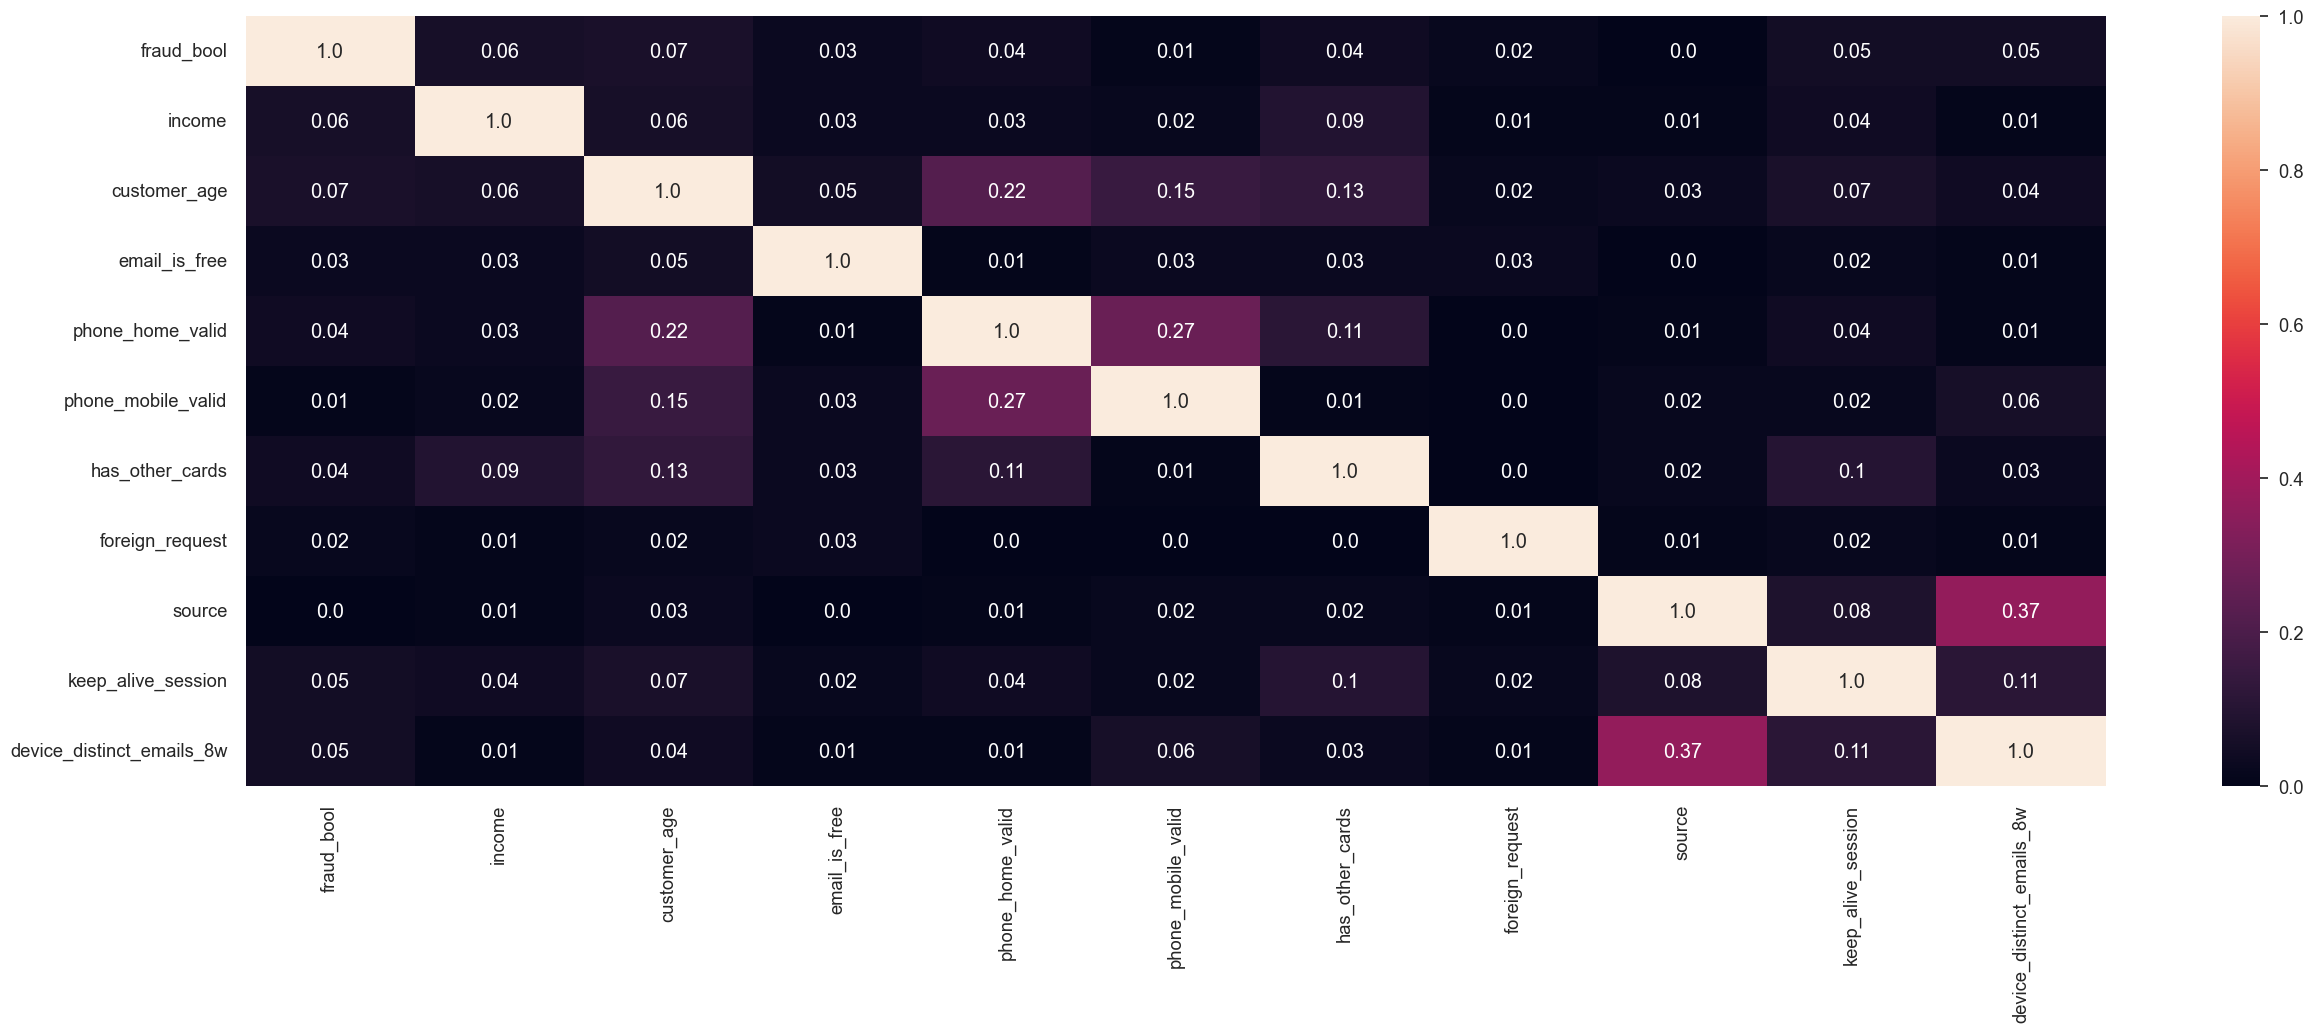

In [17]:
df.plot_cramer()

velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


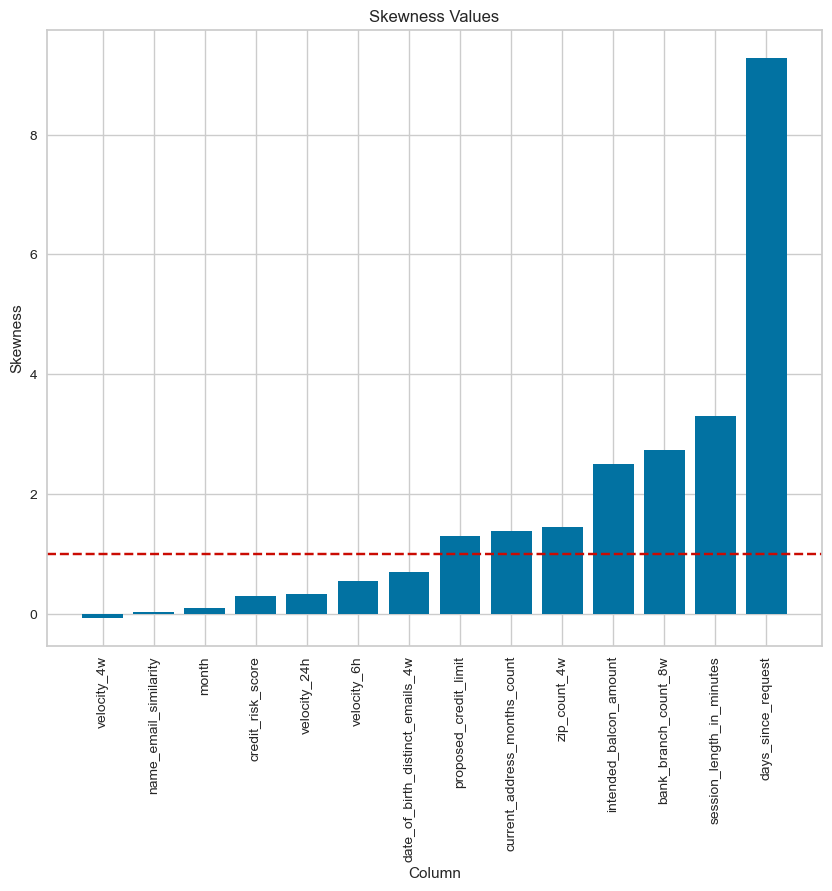

In [14]:
skewed_columns=df.draw_skewness_barchart()

In [ ]:
# for column in skewed_columns:
#     if column =='intended_balcon_amount':
#         continue
#     print(df.apply_log_transform(column))

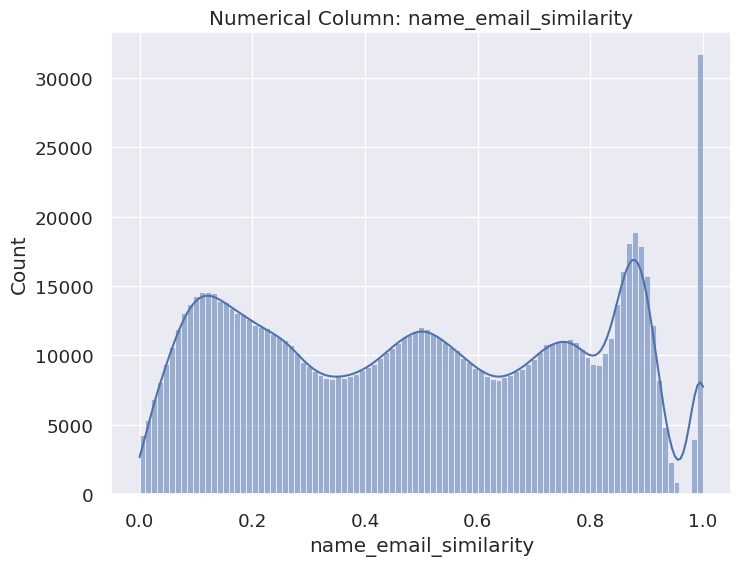

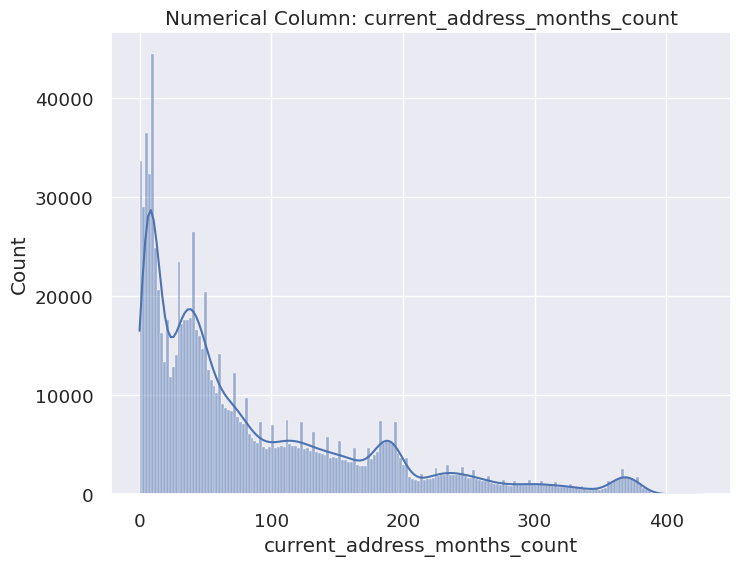

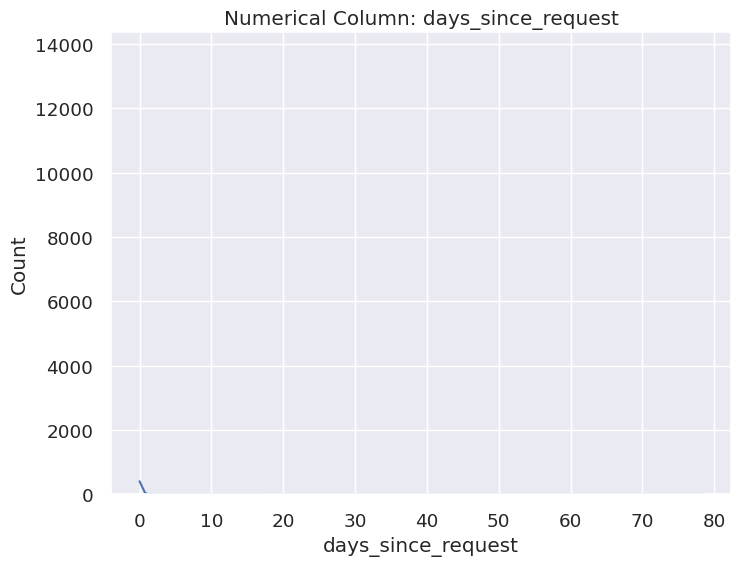

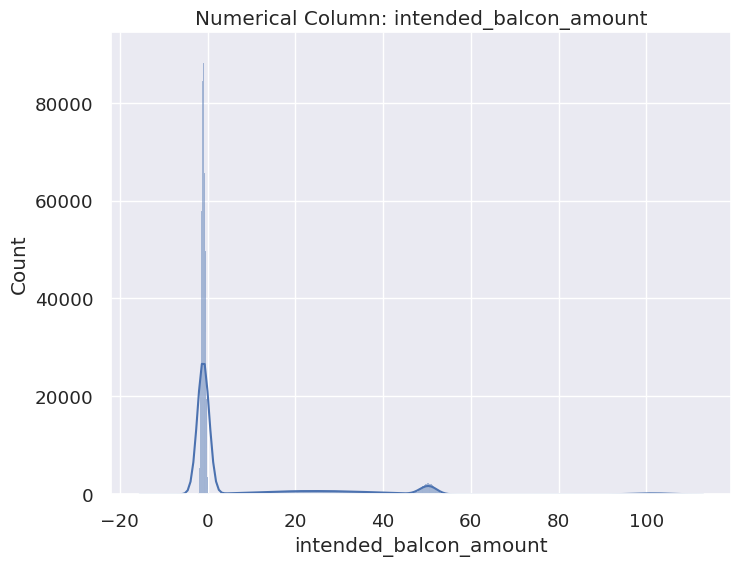

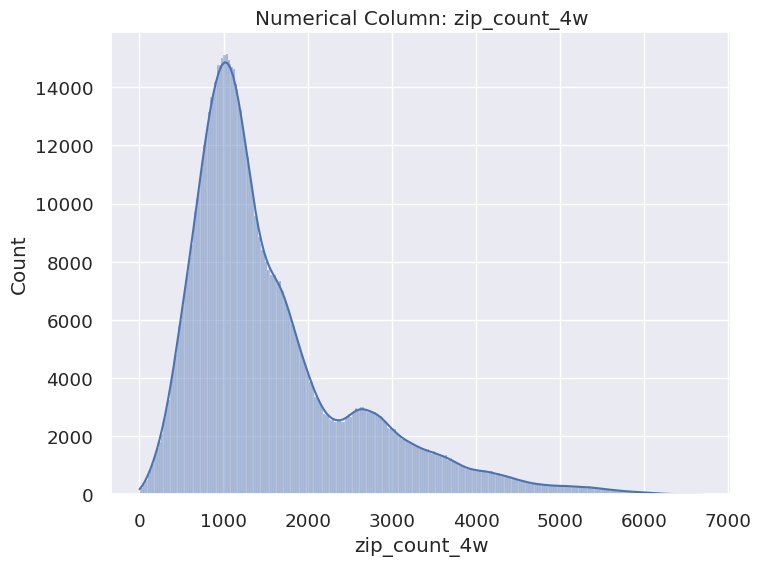

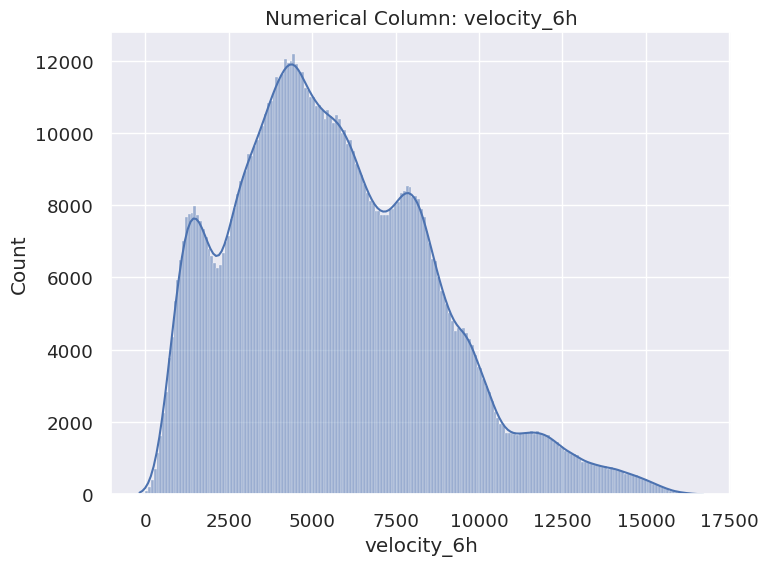

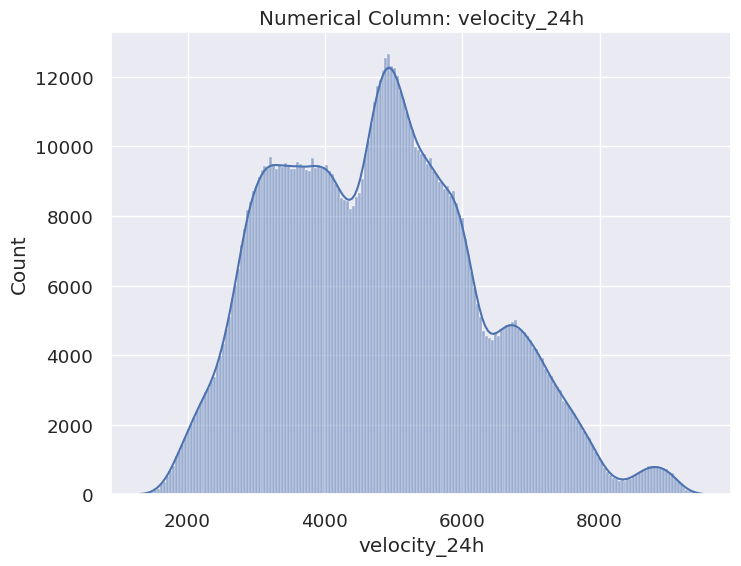

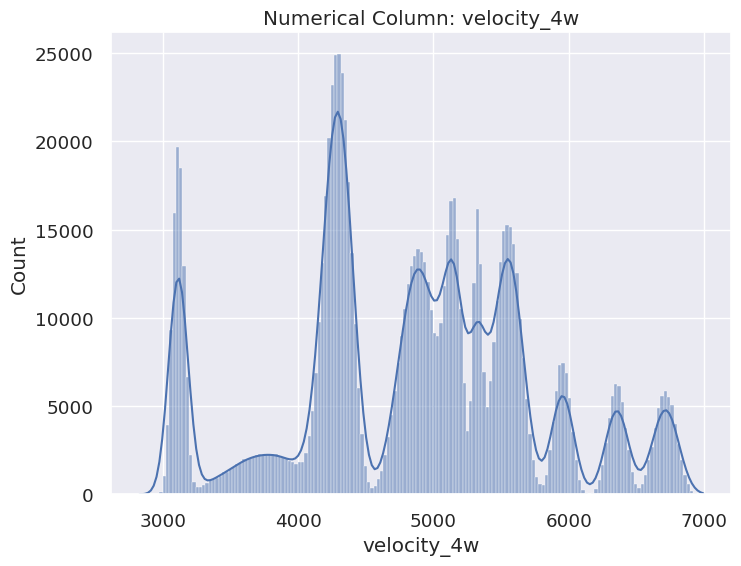

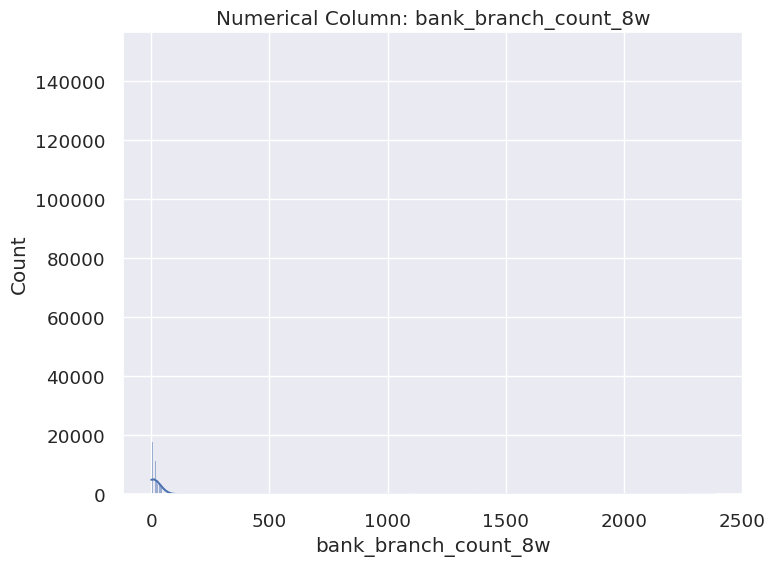

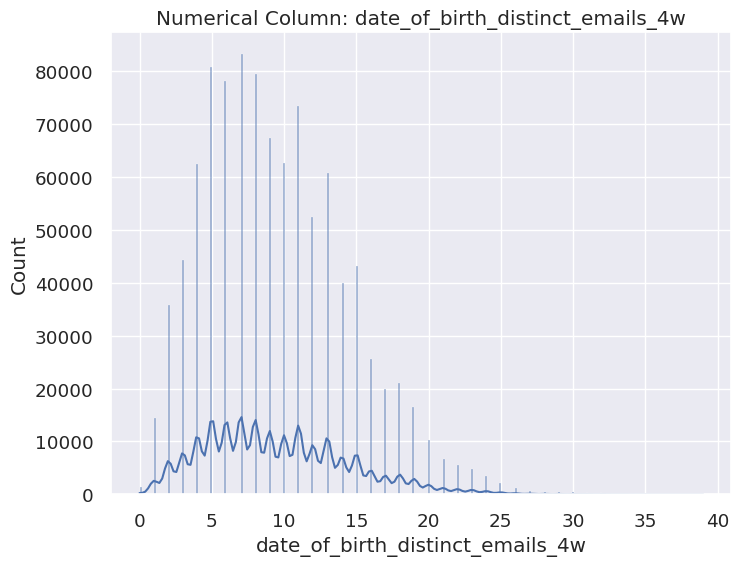

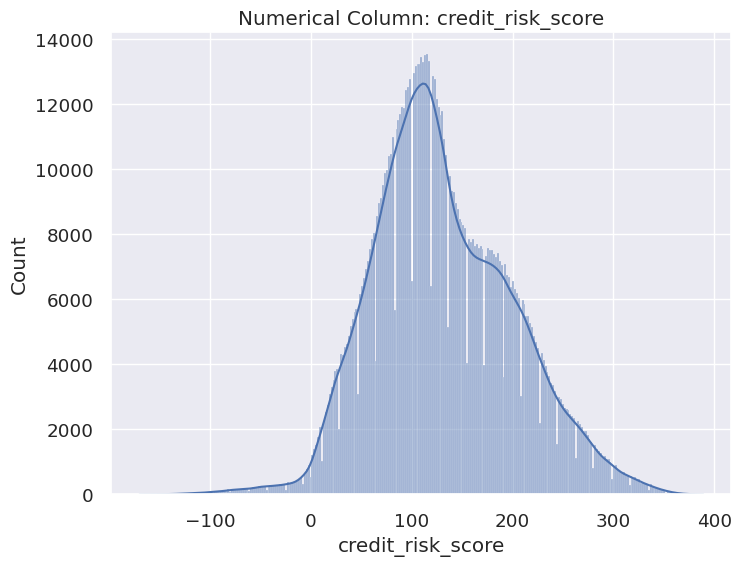

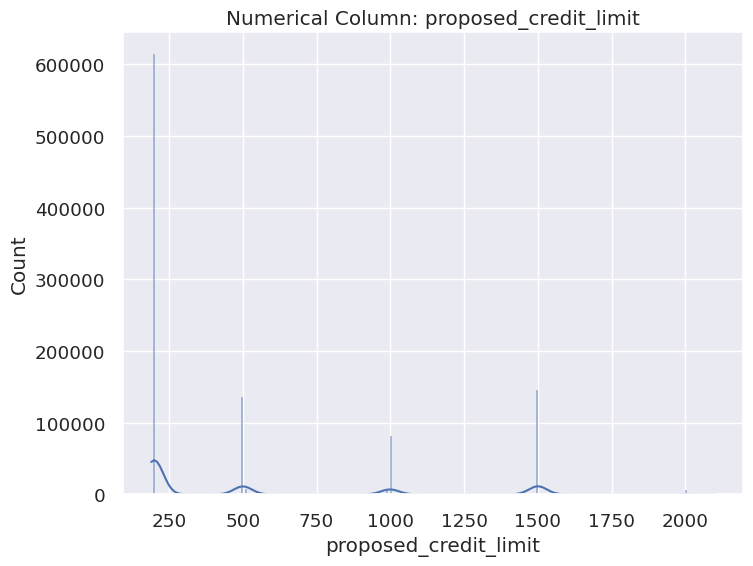

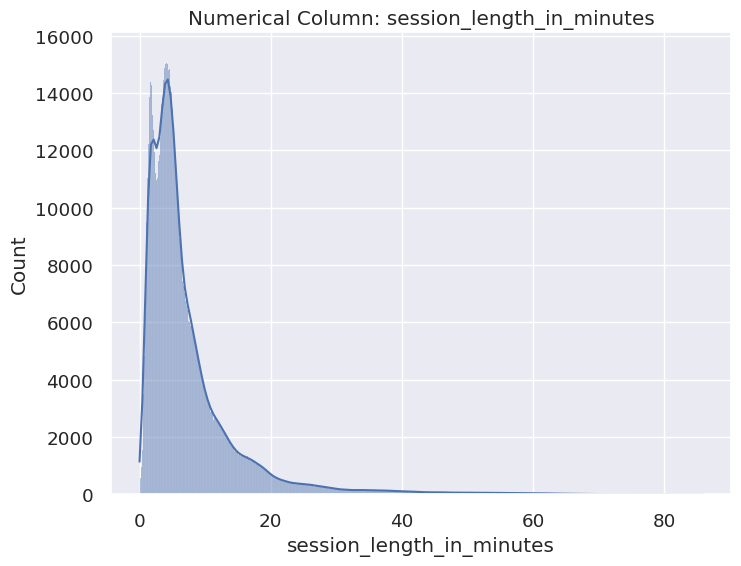

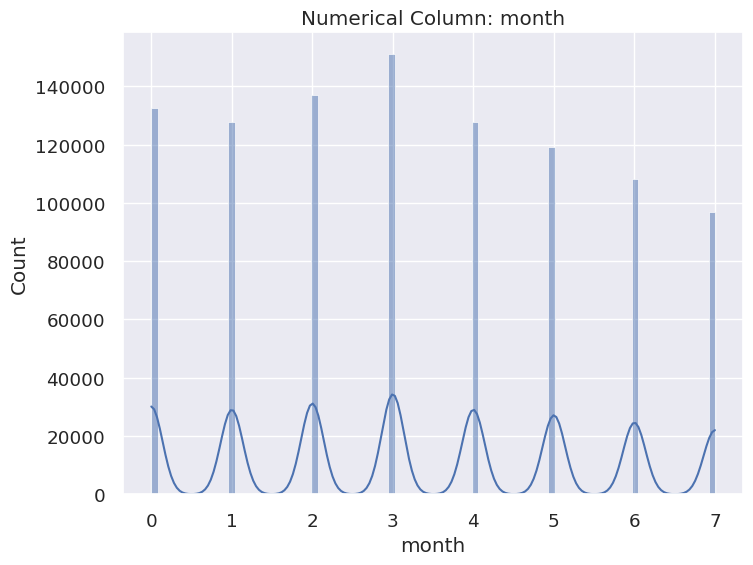

In [ ]:
df.plot_numerical_columns()

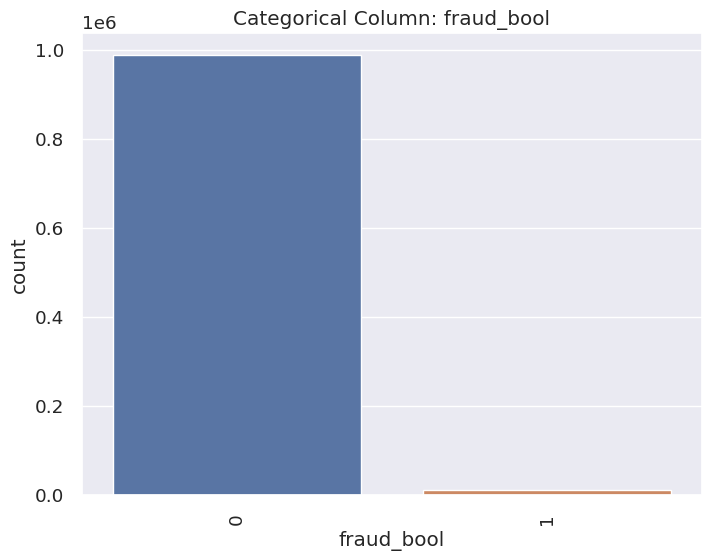

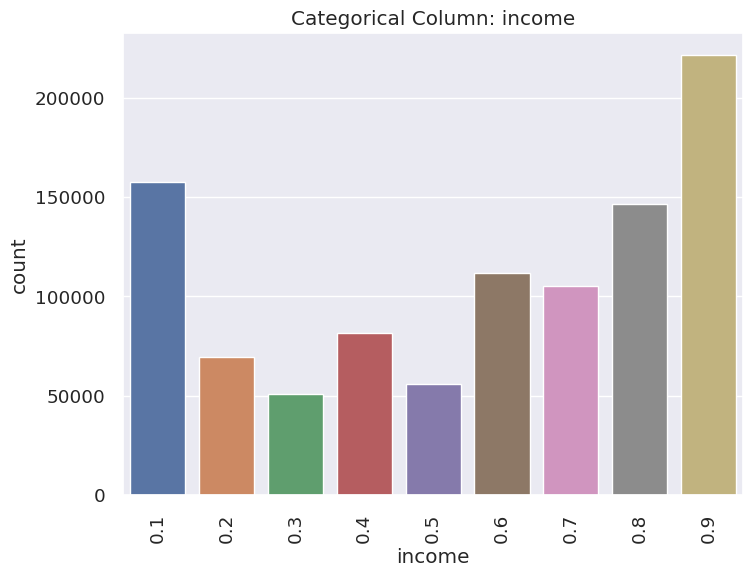

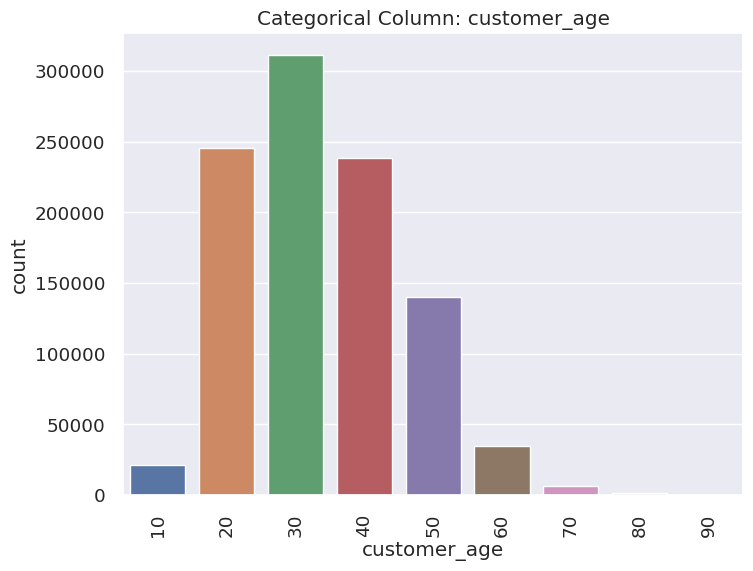

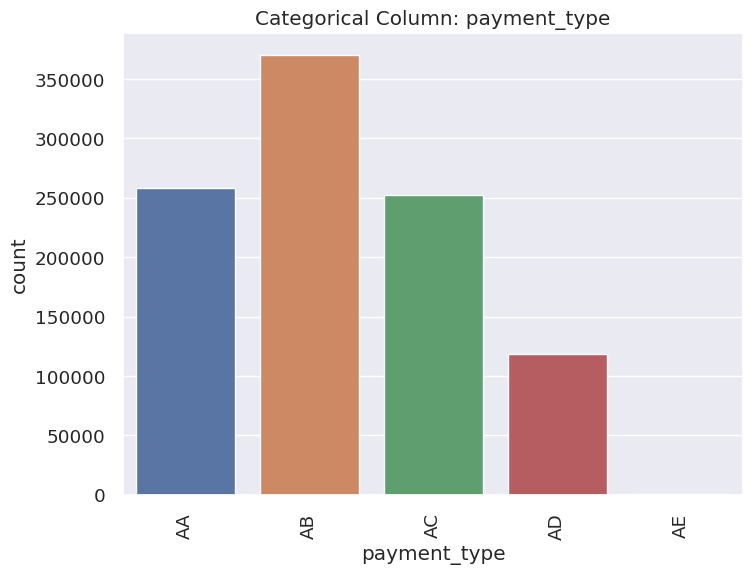

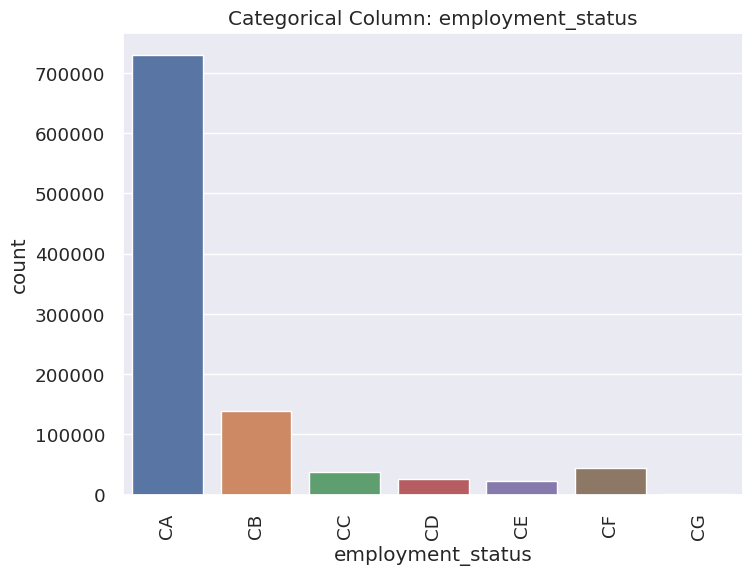

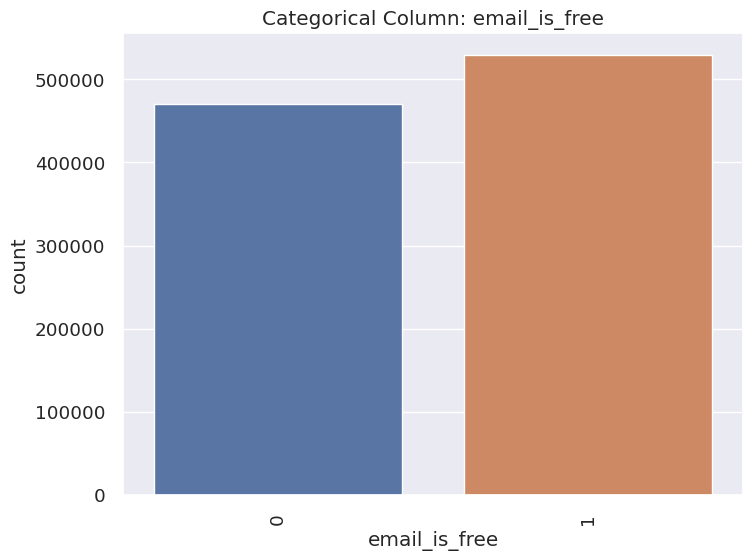

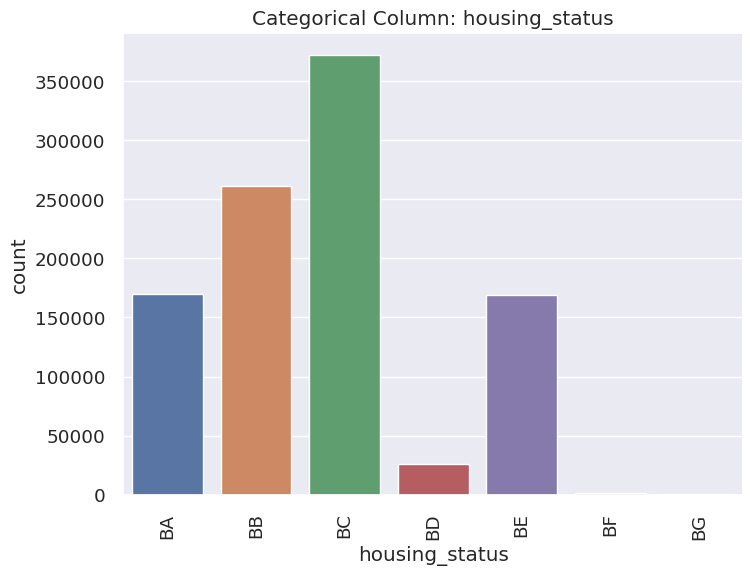

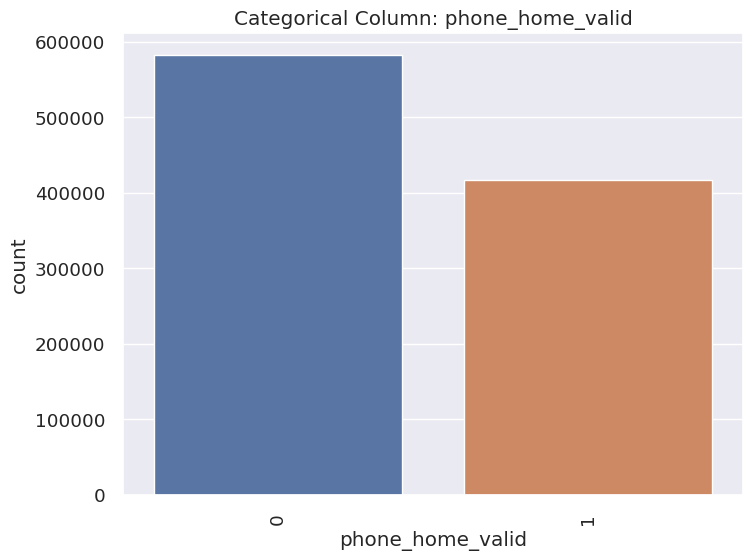

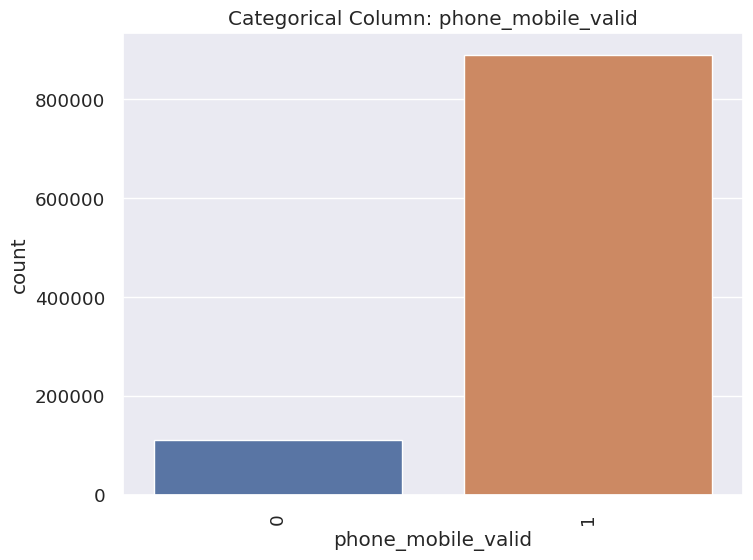

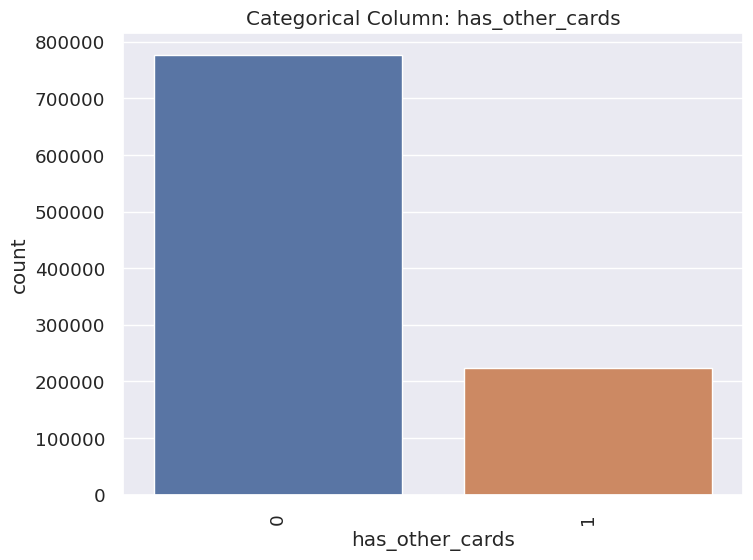

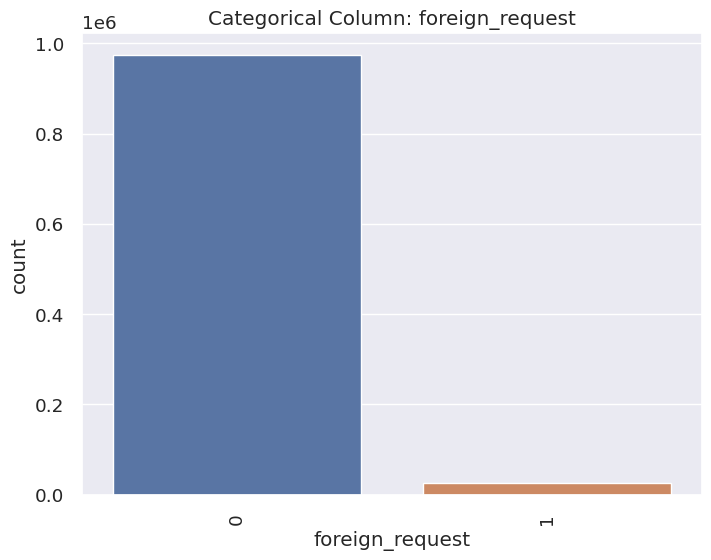

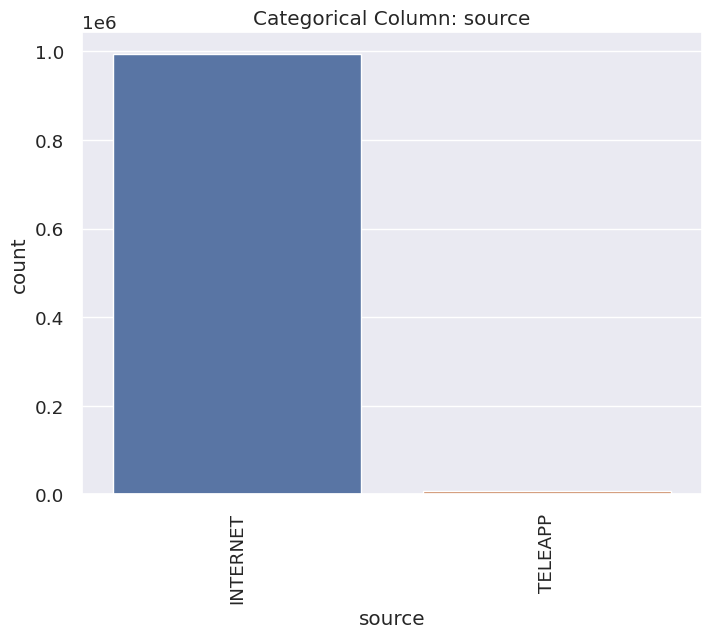

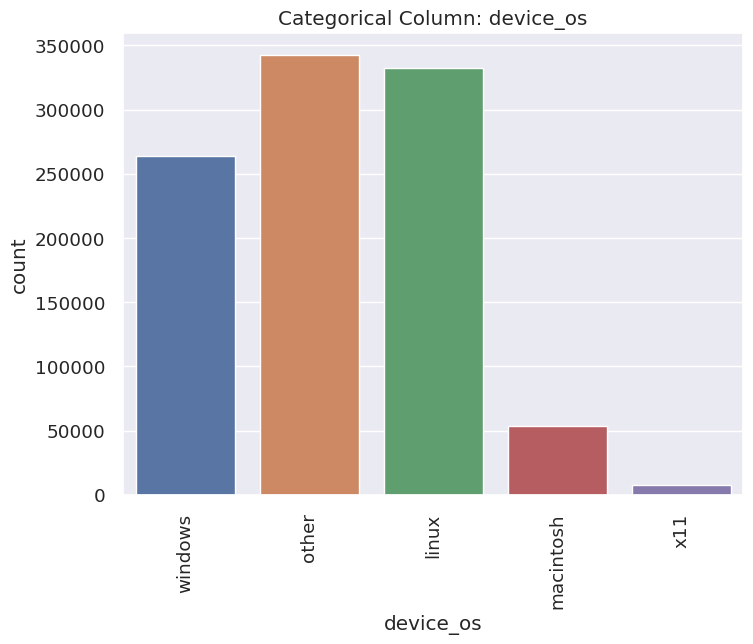

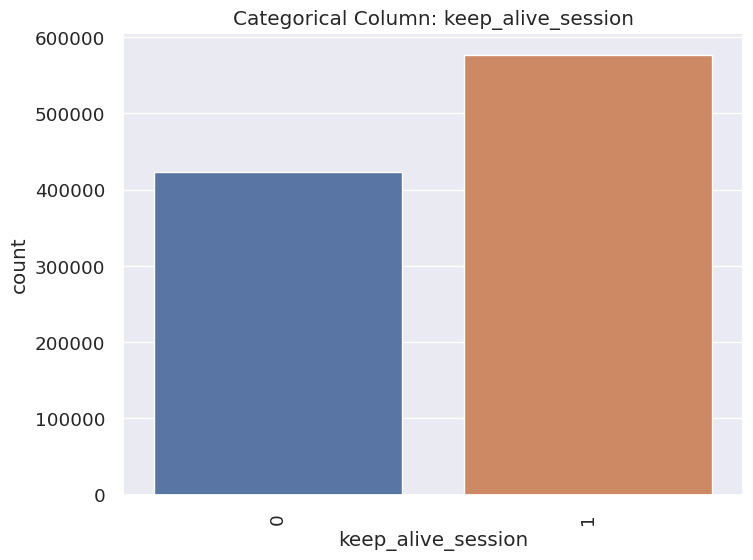

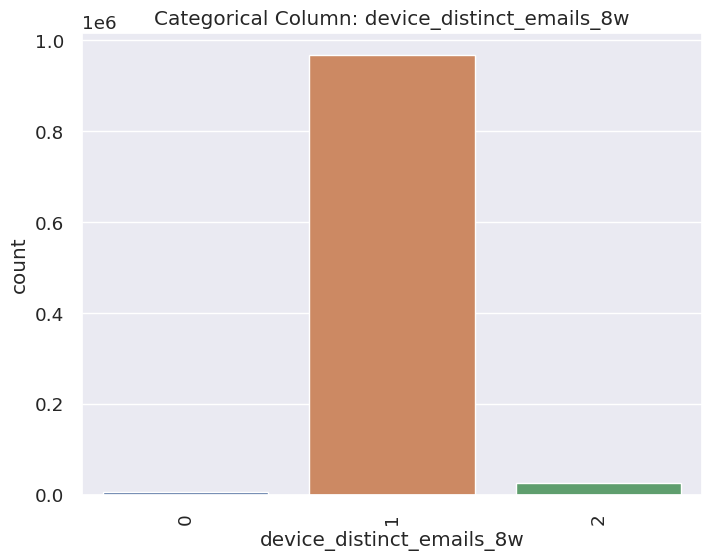

In [ ]:
df.plot_categorical_columns()

# Handle the outliers:

In [15]:
df.describe(flag='numerical')

,name_email_similarity,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,86.617645,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,131.054037,515.851010,7.562193,3.288674
std,0.289125,88.378266,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.620753,487.559902,8.023925,2.209994
min,0.000001,0.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,190.000000,0.000872,0.000000
1%,0.021672,1.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,200.000000,0.710603,0.000000
25%,0.225216,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,200.000000,3.122461,1.000000
50%,0.492153,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,200.000000,5.131503,3.000000
75%,0.755567,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,500.000000,8.866131,5.000000
99%,0.997470,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,1500.000000,44.552828,7.000000
max,0.999999,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,2100.000000,85.899143,7.000000


In [16]:
column_with_outliers=df.find_numerical_columns_with_possible_outliers()

In [16]:
column_with_outliers

['current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'proposed_credit_limit',
 'session_length_in_minutes']

In [17]:
data=df.get_data()

In [18]:
# split the data
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

In [19]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

In [20]:
data = preprocessing(X_train, y_train)

In [21]:
scalers = {}
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('robust',column)
    scalers[column] = scaler

In [22]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [23]:
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'label')
    encoders[column] = encoder

In [24]:
for column in X_test.select_dtypes(include=['object','category']).columns:
    X_test[column]=encoders[column].transform(X_test[column].values.reshape(-1, 1))

In [25]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [26]:
X_train,y_train=data.get_data()

In [27]:
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

# Logistic regression:

In [35]:
# use the best hyperparameter values which we get from step 1
param_grid = {'class_weight':['balanced'],
             'penalty': ['l2'],
             'C': [0.01]}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.01}
Best estimator: LogisticRegression(C=0.01, class_weight='balanced')
Best score: 0.857485831043328
AUC: 0.8595851425918535
TPR:  44.89% 
FPR:  5.0% 
Threshold:  0.77
Predictive Equality:  92.65%


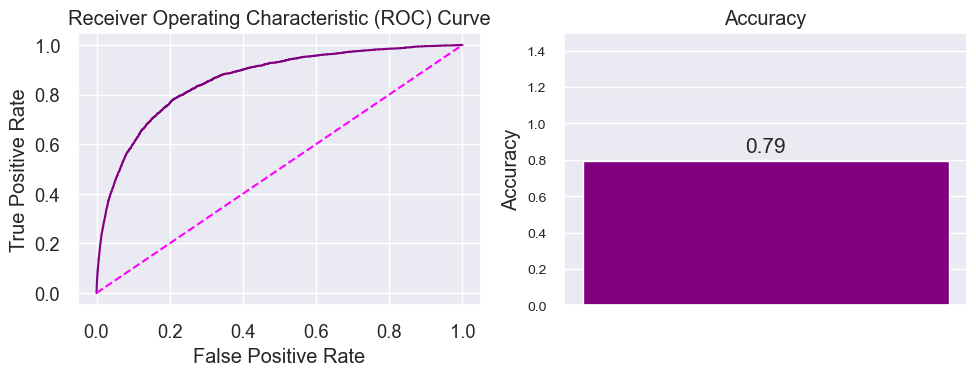

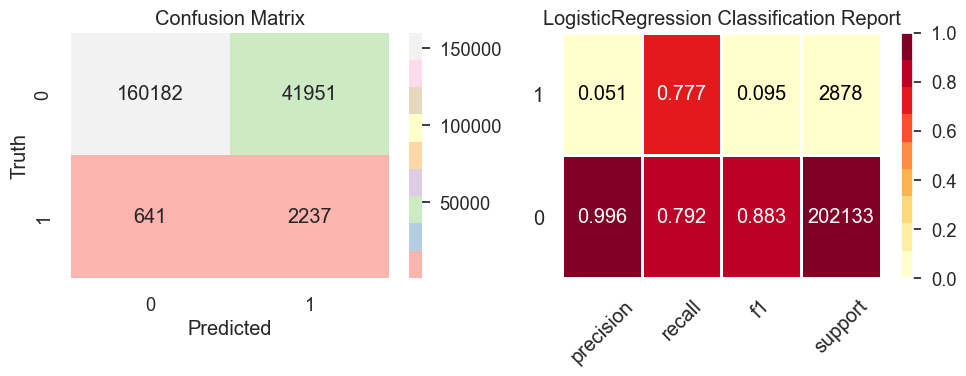

CPU times: total: 34.1 s
Wall time: 14.3 s


In [36]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

#### use the new threshold for prediction:

In [38]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.77, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.11      0.46      0.18      2878

    accuracy                           0.94    205011
   macro avg       0.55      0.70      0.57    205011
weighted avg       0.98      0.94      0.96    205011

[[191649  10484]
 [  1567   1311]]


In [39]:
saved_model_path = experiment.save_model('pipeline_2_models/LogisticRegression.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/LogisticRegression.pkl


# XGB Classifier

In [42]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'scale_pos_weight': [89.67005],     # Class weight for handling imbalanced datasets
    'n_estimators':[200],
    'max_depth':[5],
    
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'scale_pos_weight': 89.67005, 'n_estimators': 200, 'max_depth': 5, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, max_depth=5, n_estimators=200,
              scale_pos_weight=89.67005)
Best score: 0.8898766753022754
AUC: 0.884017307225253
TPR:  51.11% 
FPR:  4.9799999999999995% 
Threshold:  0.75
Predictive Equality:  80.25999999999999%


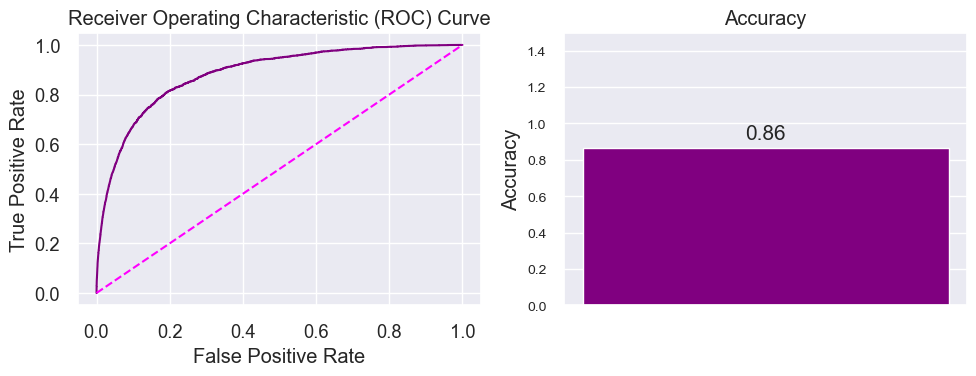

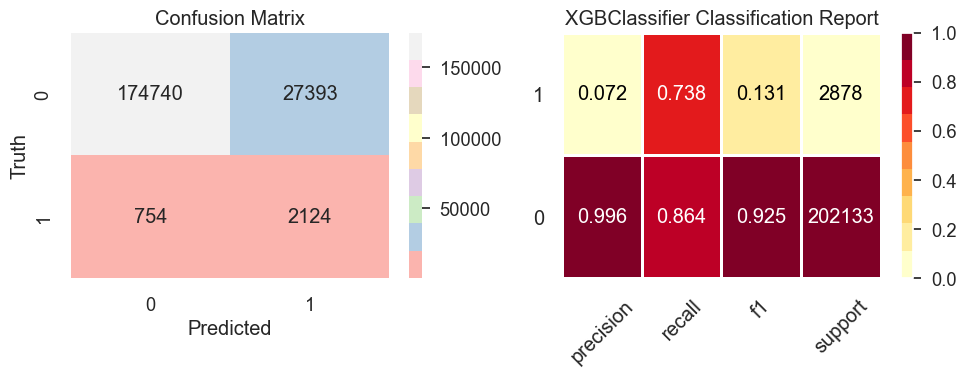

CPU times: total: 5min 9s
Wall time: 9min 4s


In [43]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [44]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.75, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.51      0.21      2878

    accuracy                           0.95    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.95      0.96    205011

[[192283   9850]
 [  1422   1456]]


In [45]:
saved_model_path = experiment.save_model('pipeline_2_models/Xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/Xgboost.pkl


# Random forest:

In [47]:
# Define the hyperparameter gained from step 1
param_grid = {
    'n_estimators': [150],              # Number of trees in the forest - Default value is 100
    'max_depth': [10],                # Maximum depth of the trees - Default value is None (unlimited)
    'min_samples_split': [5],           # Minimum number of samples required to split an internal node - Default value is 2
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=150)
Best score: 0.877048485477065
AUC: 0.875149841739791
TPR:  48.19% 
FPR:  5.0% 
Threshold:  0.64
Predictive Equality:  98.92%


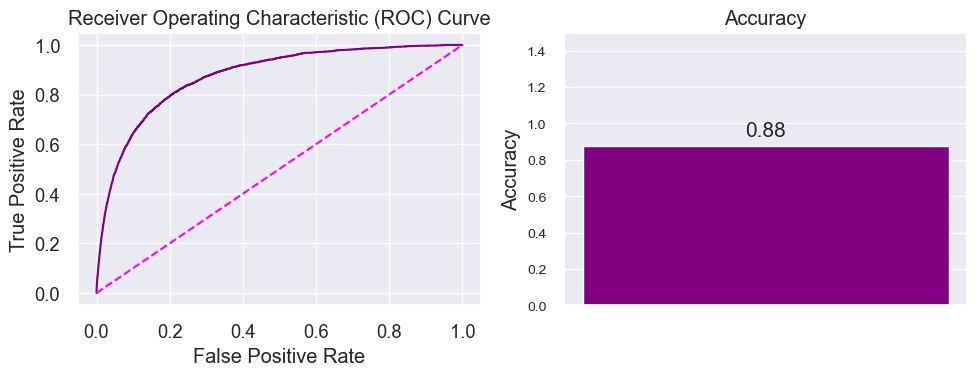

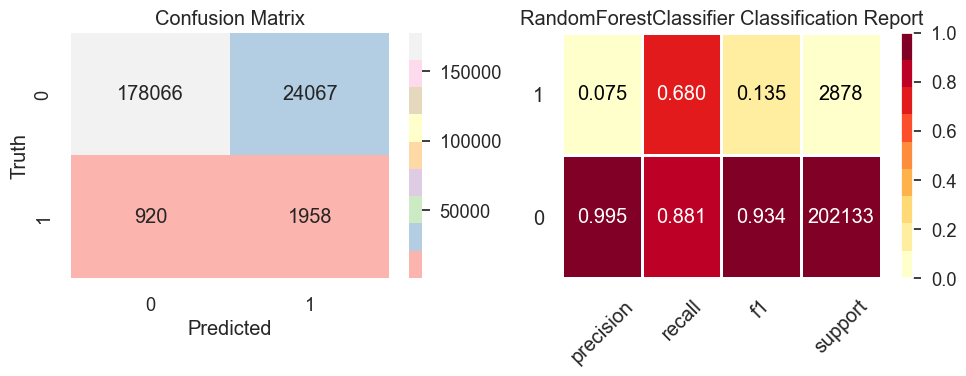

CPU times: total: 5min 5s
Wall time: 8min 47s


In [48]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [49]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.64, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.48      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.72      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[192081  10052]
 [  1492   1386]]


In [50]:
saved_model_path = experiment.save_model('pipeline_2_models/RandomForest.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/RandomForest.pkl


# AdaBoost Classifier

In [53]:
# using the hyperparamters which we get from step 1
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100], 
    'learning_rate': [0.1], 
    'base_estimator': [DecisionTreeClassifier(max_depth=2)]
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2)}
Best estimator: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=100)
Best score: 0.8881349905836063
AUC: 0.8851733682101101
TPR:  52.61% 
FPR:  4.99% 
Threshold:  0.42
Predictive Equality:  100.0%


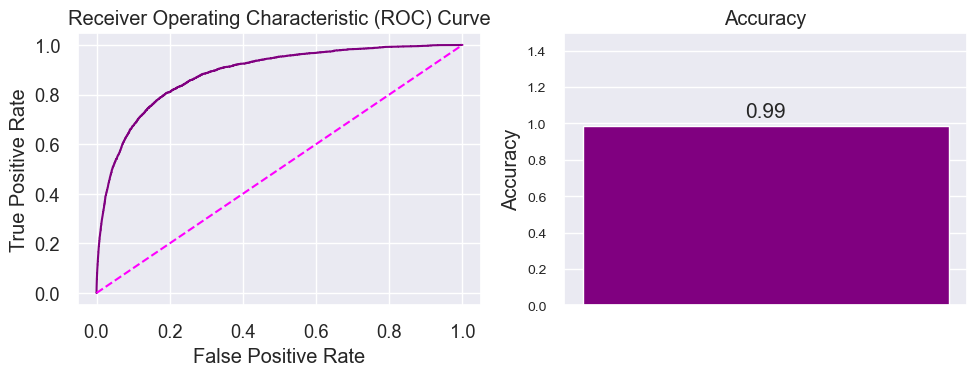

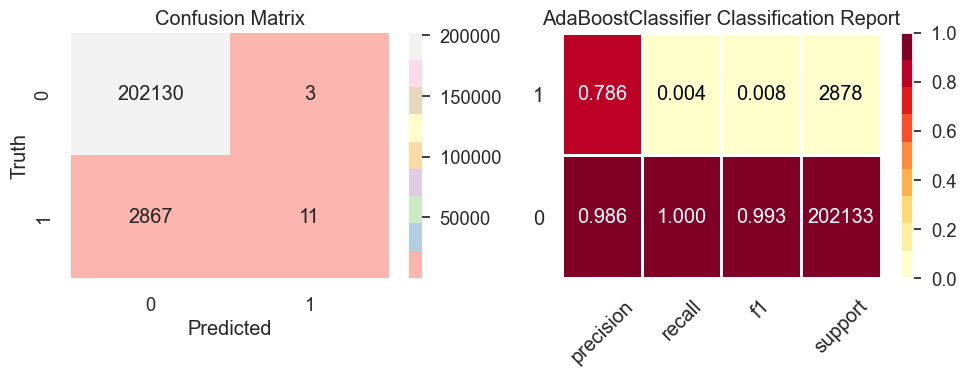

CPU times: total: 5min 58s
Wall time: 10min 20s


In [54]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [57]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.42, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    202133
           1       0.15      0.48      0.23      2878

    accuracy                           0.95    205011
   macro avg       0.57      0.72      0.60    205011
weighted avg       0.98      0.95      0.97    205011

[[194289   7844]
 [  1503   1375]]


In [56]:
saved_model_path = experiment.save_model('pipeline_2_models/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/adaboost.pkl


# LGBM

In [31]:
from lightgbm import LGBMClassifier
# Define the LGBMClassifier
lgbm_model = LGBMClassifier(scale_pos_weight=80)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [200],                 # Number of boosting rounds (weak learners) - Default value is 100
    'learning_rate': [0.1],                # Learning rate for each boosting round - Default value is 0.1
    'max_depth': [7],                     # Maximum depth of the trees - Default value is -1 (unlimited)
    'num_leaves': [15],                    # Maximum number of leaves in one tree - Default value is 31
    'min_child_samples': [20],             # Minimum number of data points in a leaf - Default value is 20
}
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Info] Number of positive: 8151, number of negative: 786838
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 794989, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010253 -> initscore=-4.569882
[LightGBM] [Info] Start training from score -4.569882
Best hyperparameters: {'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1}
Best estimator: LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=15,
               scale_pos_weight=80)
Best score: 0.8887326705228776
AUC: 0.882566198002817
TPR:  50.42% 
FPR:  4.99% 
Threshold:  0.8
Predictive Equality:  79.69000000000001%


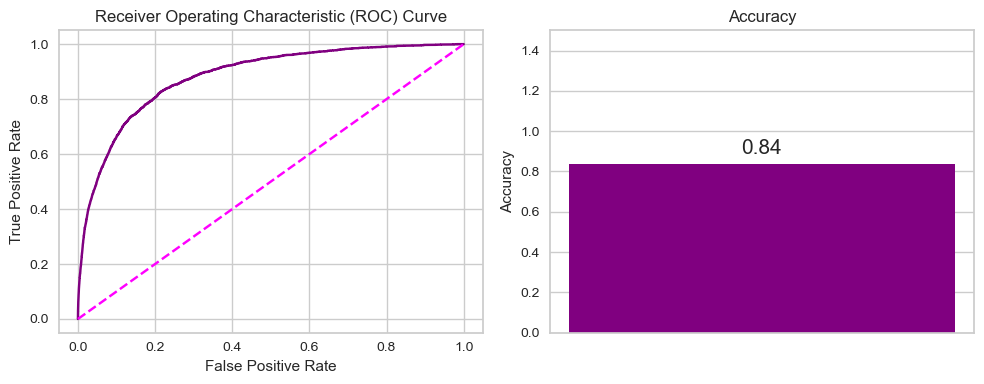

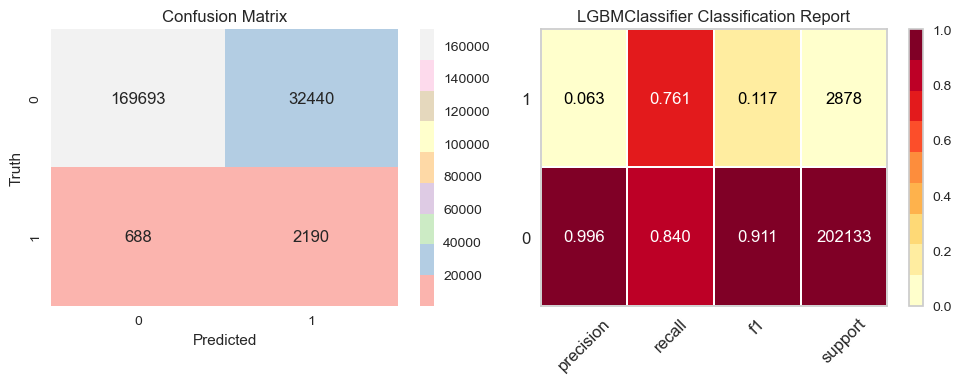

CPU times: total: 40.5 s
Wall time: 13.5 s


In [32]:
%%time
experiment.train(lgbm_model,param_grid=param_grid,search_type='random')

In [33]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.8, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.51      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191925  10208]
 [  1416   1462]]


In [34]:
saved_model_path = experiment.save_model('pipeline_2_models/lgbm.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/lgbm.pkl


# NN Model

In [35]:
# Keras model using dropout and batch normalization
nn_model2 = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
experiment=nn_modeling(nn_model2, X_train,X_test,y_train,y_test,train_groups,test_groups)

In [37]:
%%time
hist = experiment.compile_and_train(lr = 1e-2)

Epoch 1/100
1398/1398 [==============================] - 8s 4ms/step - loss: 1.1185 - fn: 1830.0000 - fp: 191602.0000 - tn: 515737.0000 - tp: 6321.0000 - precision: 0.0319 - recall: 0.7755 - f1: 0.0642 - val_loss: 0.5321 - val_fn: 0.0000e+00 - val_fp: 20309.0000 - val_tn: 59190.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
1398/1398 [==============================] - 6s 4ms/step - loss: 1.0312 - fn: 1747.0000 - fp: 157666.0000 - tn: 549673.0000 - tp: 6404.0000 - precision: 0.0390 - recall: 0.7857 - f1: 0.0753 - val_loss: 0.5726 - val_fn: 0.0000e+00 - val_fp: 24433.0000 - val_tn: 55066.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
1398/1398 [==============================] - 6s 4ms/step - loss: 1.0187 - fn: 1757.0000 - fp: 154410.0000 - tn: 552929.0000 - tp: 6394.0000 - precision: 0.0398 - recall: 0.7844 - f1: 0.0765 - val_loss: 0.9314 - val_fn: 0.0000e+00 

6407/6407 [==============================] - 4s 674us/step
AUC: 0.8749902812907567
TPR:  48.26% 
FPR:  5.0% 
Threshold:  0.96
Predictive Equality:  92.91%


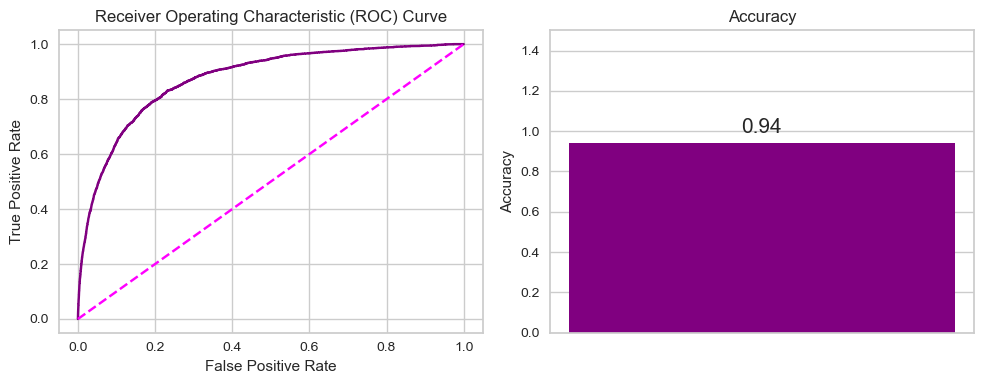

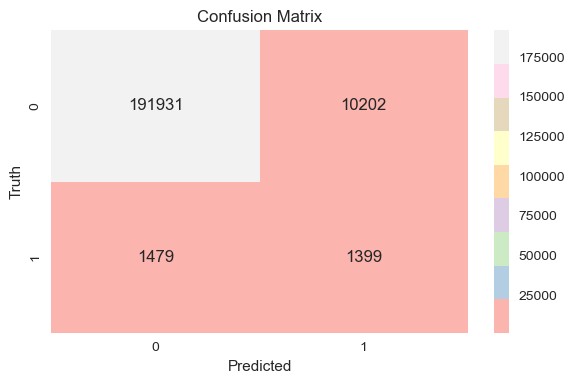

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.49      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.72      0.58    205011
weighted avg       0.98      0.94      0.96    205011



In [38]:
experiment.score_keras_model()

In [39]:
saved_model_path = experiment.save_model('pipeline_2_models/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: pipeline_2_models/deeplearning\assets


INFO:tensorflow:Assets written to: pipeline_2_models/deeplearning\assets


Model saved at: pipeline_2_models/deeplearning


# catboost:

In [40]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=100,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    depth=6,                    # Depth of the trees
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False,              # Set to True to display training progress
    class_weights=[1,80]
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000002112B1A4A30>
Best score: 0.8927085400048892
AUC: 0.891607684035859
TPR:  54.76% 
FPR:  4.9799999999999995% 
Threshold:  0.75
Predictive Equality:  89.3%


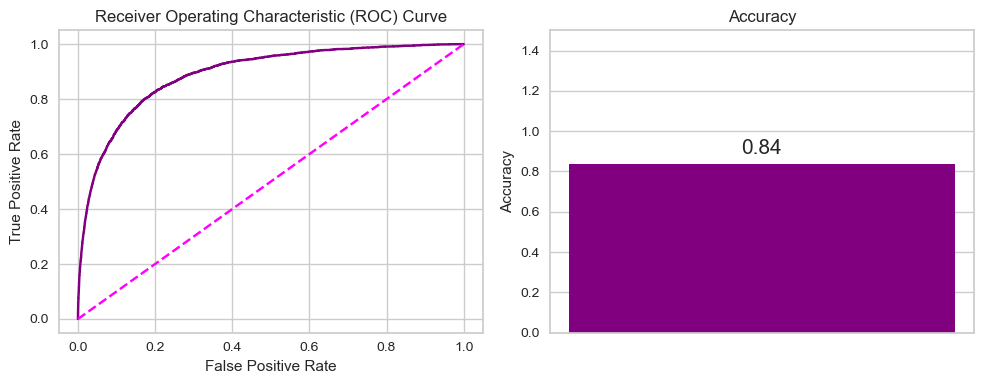

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    202133
           1       0.06      0.78      0.12      2878

    accuracy                           0.84    205011
   macro avg       0.53      0.81      0.52    205011
weighted avg       0.98      0.84      0.90    205011

CPU times: total: 9.31 s
Wall time: 19.3 s


In [41]:
%%time
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [42]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.75, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.55      0.22      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191896  10237]
 [  1294   1584]]


In [43]:
saved_model_path = experiment.save_model('pipeline_2_models/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/catboost.pkl



## **Summary and Comments on Each Model:**

1. **Logistic Regression**:
   - AUC: 0.8595851425918535
   - TPR: 44.89%
   - FPR: 5.0%
   - Threshold: 0.77
   - Predictive Equality: 92.65%
   - Comments: The logistic regression model performs reasonably well, with an acceptable AUC and TPR. The Predictive Equality score of 92.65% indicates that it has improved fairness compared to some models, but there is still some disparity in FPR across protected groups.

2. **Random Forest**:
   - AUC: 0.875149841739791
   - TPR: 48.19%
   - FPR: 5.0%
   - Threshold: 0.64
   - Predictive Equality: 98.92%
   - Comments: The random forest model shows improved fairness compared to previous models, with a high Predictive Equality score of 98.92%. However, its AUC and TPR are not as high as some other models.

3. **XGBoost**:
   - AUC: 0.884017307225253
   - TPR: 51.11%
   - FPR: 4.98%
   - Threshold: 0.75
   - Predictive Equality: 80.26%
   - Comments: XGBoost demonstrates good AUC and TPR, but the Predictive Equality score of 80.26% suggests there is still some disparity in FPR between protected groups. Further fairness improvements may be considered.

4. **Deep Learning**:
   - AUC: 0.8749902812907567
   - TPR: 48.26%
   - FPR: 5.0%
   - Threshold: 0.96
   - Predictive Equality: 92.91%
   - Comments: The deep learning model performs reasonably well, with a good AUC and TPR. Its Predictive Equality score of 92.91% indicates improved fairness compared to previous models, but there is still some room for enhancing fairness further.

5. **AdaBoost**:
   - AUC: 0.8851733682101101
   - TPR: 52.61%
   - FPR: 4.99%
   - Threshold: 0.42
   - Predictive Equality: 100.0%
   - Comments: AdaBoost achieves high fairness with a perfect Predictive Equality score of 100.00%. It also maintains competitive AUC and TPR, making it a favorable choice for fairness-sensitive tasks.

6. **CatBoost**:
   - AUC: 0.891607684035859
   - TPR: 54.76%
   - FPR: 4.98%
   - Threshold: 0.75
   - Predictive Equality: 89.3%
   - Comments: CatBoost exhibits good AUC and TPR. Its Predictive Equality score of 89.30% indicates improved fairness compared to some models, but there is still some disparity in FPR between protected groups.

7. **LGBM**:
   - AUC: 0.882566198002817
   - TPR: 50.42%
   - FPR: 4.99%
   - Threshold: 0.80
   - Predictive Equality: 79.69%
   - Comments: LGBM shows moderate fairness with a Predictive Equality score of 79.69%. While its AUC and TPR are reasonable, there is still room for enhancing fairness further.

**Summary:**
- AdaBoost stands out as the most fair model, achieving a perfect Predictive Equality score (100.00%).
- CatBoost and Random Forest demonstrate good fairness with high Predictive Equality scores.
- XGBoost, Logistic Regression, and Deep Learning models show relatively good fairness but have some room for improvement.
- LGBM exhibits moderate fairness but may benefit from further enhancements.
- Based on fairness and overall performance, AdaBoost and CatBoost appear to be the top contenders among the models evaluated.

# Tune The Best Model

In [28]:
from catboost import CatBoostClassifier
# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'iterations': np.arange(100, 1000, 100),  # Number of boosting iterations
    'depth': np.arange(3, 9),               # Depth of the trees
    'learning_rate': [0.01, 0.05, 0.1], # Learning rate
    'l2_leaf_reg': [1, 3, 5],             # L2 regularization coefficient
    'class_weights':[{0:1,1:80}],
    'verbose':[0]
}

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best hyperparameters: {'verbose': 0, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 400, 'depth': 4, 'class_weights': {0: 1, 1: 80}}
Best estimator: <catboost.core.CatBoostClassifier object at 0x000001F706A272B0>
Best score: 0.8958577923458773
AUC: 0.8934326388909397
TPR:  55.35% 
FPR:  5.0% 
Threshold:  0.76
Predictive Equality:  87.51%


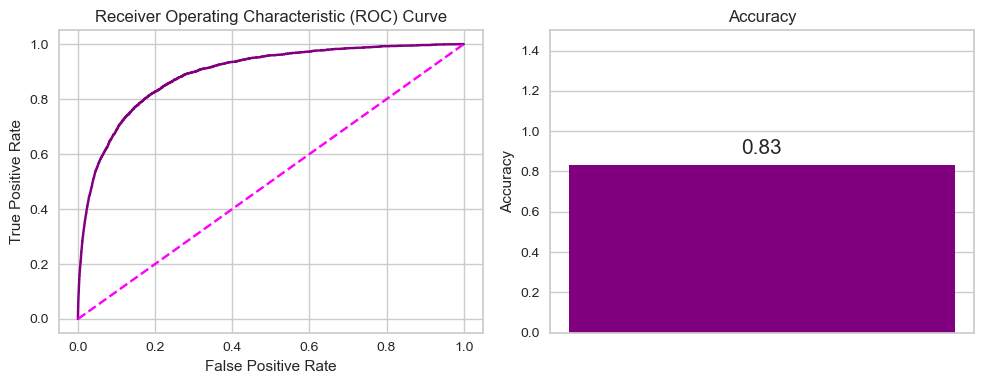

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    202133
           1       0.06      0.79      0.12      2878

    accuracy                           0.83    205011
   macro avg       0.53      0.81      0.51    205011
weighted avg       0.98      0.83      0.90    205011

CPU times: total: 30.2 s
Wall time: 8min 10s


In [29]:
%%time
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost_model,param_grid=param_grid,search_type='random')

In [36]:
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.76, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.56      0.22      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191745  10388]
 [  1272   1606]]


In [37]:
saved_model_path = experiment.save_model('pipeline_2_models/catboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_2_models/catboost_after_tuning.pkl
